# Transpile :


1. Makes the given circuit compatible with the backend circuit layout by using their respective basis gates.
2. optimize the circuit to execute on noisy systems

Reference:
   1.  https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html#qiskit.compiler.transpile
    
    
   2. https://qiskit.org/documentation/apidoc/transpiler.html

In [1]:
from qiskit import QuantumCircuit,IBMQ,execute, transpile,Aer
from qiskit.visualization import plot_circuit_layout

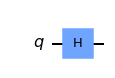

In [2]:
qc=QuantumCircuit(1)
qc.h(0)
qc.draw(output="mpl")

### parameter: quantumcircuit

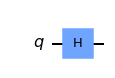

In [3]:
transpile_circuit=transpile(qc)
transpile_circuit.draw(output="mpl")

### parameter: quantum circuit on the real backend

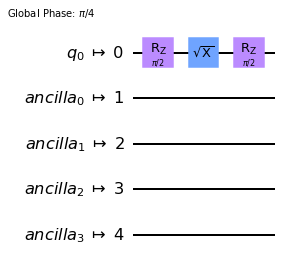

In [4]:
provider=IBMQ.load_account() 
#Get the backend
backend=provider.get_backend('ibmq_bogota')

transpile_circuit=transpile(qc,backend)
transpile_circuit.draw(output="mpl")

### Note: 
For the real backend 'ibmq_bogota' h gate is transpiled to the basis gates Rz-sqrt(x)-Rz

In [5]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

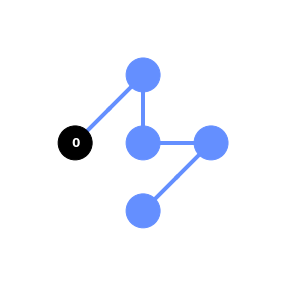

In [6]:
plot_circuit_layout(transpile_circuit, backend)

# Let's take a complex circuit to understand much better

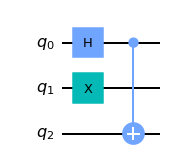

In [7]:
qc=QuantumCircuit(3)
qc.h(0)
qc.x(1)
qc.cx(0,2)
qc.draw(output="mpl")

In [8]:
qc.depth()

2

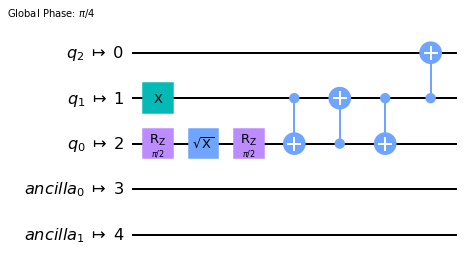

In [9]:
transpile_circuit=transpile(qc,backend)
transpile_circuit.draw(output="mpl")

### Note: 
- S is transpiled into Rz(pi/2)
- swap gate is transpiled into 3 Cnot gates as seen

In [10]:
transpile_circuit.depth()

7

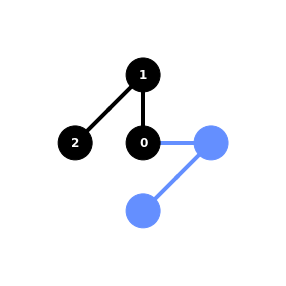

In [11]:
plot_circuit_layout(transpile_circuit, backend)

# optimization level: 

use the parameter and  observe the what kind of changes are seen 

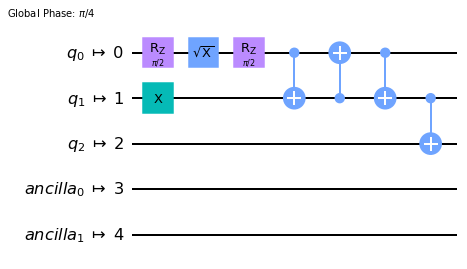

In [12]:
transpile_circuit_0=transpile(qc,backend,optimization_level=0)
transpile_circuit_0.draw(output="mpl")

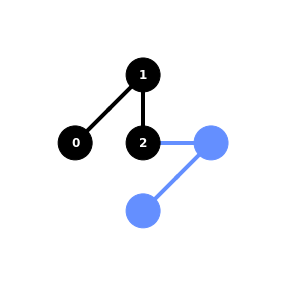

In [13]:
plot_circuit_layout(transpile_circuit_0, backend)

In [14]:
transpile_circuit_0.depth()

7

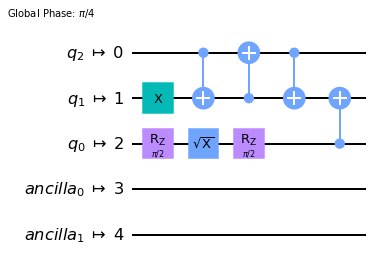

In [15]:
transpile_circuit_1=transpile(qc,backend,optimization_level=1)
transpile_circuit_1.draw(output="mpl")

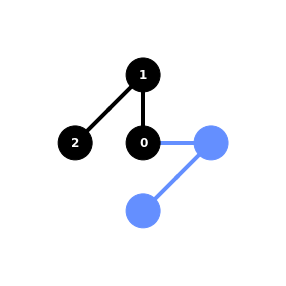

In [16]:
plot_circuit_layout(transpile_circuit_1, backend)

In [17]:
transpile_circuit_1.depth()

5

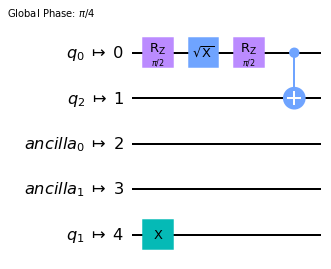

In [18]:
transpile_circuit_2=transpile(qc,backend,optimization_level=2)
transpile_circuit_2.draw(output="mpl")

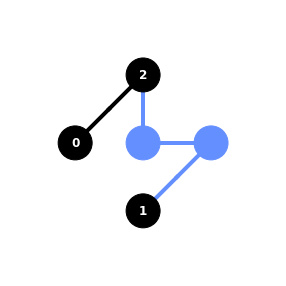

In [19]:
plot_circuit_layout(transpile_circuit_2, backend)

In [20]:
transpile_circuit_2.depth()

4

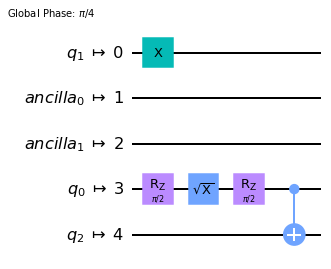

In [21]:
transpile_circuit_3=transpile(qc,backend,optimization_level=3)
transpile_circuit_3.draw(output="mpl")

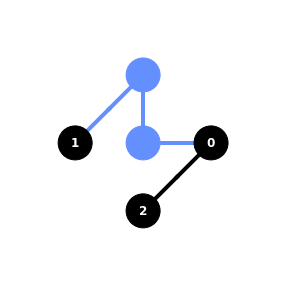

In [22]:
plot_circuit_layout(transpile_circuit_3, backend)

In [23]:
transpile_circuit_3.depth()

4

### Conclusion:  
- optimization level     depth       qubits in the circuit
        0                  5         0,1,2
        1                  7         0,1,2
        2                  4         1,3,4
        3                  4         2,3,4
        
- as we increase the optmization level, there is a effect on the depth of the circuit and the qubits used in the real device

- we can use the parameter "initial_layout" to select the physical qubits from the real device and mapped to the circuit

In [24]:
from qiskit.tools.jupyter import *
backend

<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>

# Lets see the initial layout , how it works

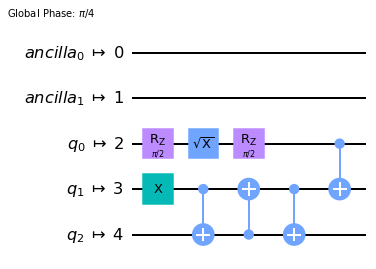

In [25]:
transpile_circuit_new=transpile(qc,backend,optimization_level=3,initial_layout=[2,3,4])
transpile_circuit_new.draw(output="mpl")

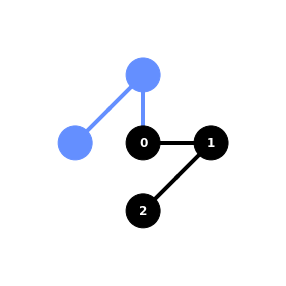

In [26]:
plot_circuit_layout(transpile_circuit_new, backend)

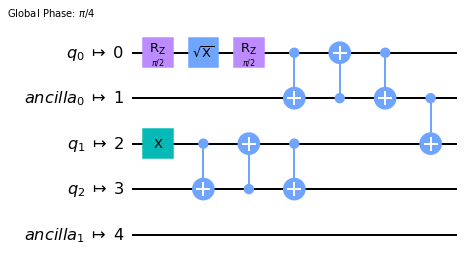

In [27]:
transpile_circuit_new=transpile(qc,backend,optimization_level=3,initial_layout=[0,2,3])
transpile_circuit_new.draw(output="mpl")

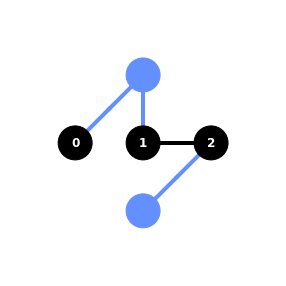

In [28]:
plot_circuit_layout(transpile_circuit_new, backend)

In [29]:
transpile_circuit_new.depth()

7

# Conclusion:
1. optmization level =3
2. depending on the physical qubits(real device) mapped with the logical qubits 
3. depth has increased.
4. we need to carefully mapped the qubits in the parameter initial_layout 